# 1- Math

## Bubble Sort

In [23]:
function bubble_sort!(a)
    n = length(a)
    for i in 1:n-1
        for j in 1:n-i
            if a[j] > a[j+1]
                a[j], a[j+1] = a[j+1], a[j]
            end
        end
    end
    return a
end

bubble_sort!([2, 1, 4, 3])

4-element Array{Int64,1}:
 1
 2
 3
 4

## Roots of a Polynomial

In [16]:
using Roots

function polynomial_generator(a...)
    n = length(a)-1
    poly = x -> sum([a[i+1] * x^i for i in 0:n])
    return poly
end

polynomial = polynomial_generator(2, 4, -10)
zeroVals = find_zeros(polynomial, -10, 10)
print(zeroVals)

[-0.289898, 0.689898]

## Markov Chain

In [ ]:
using LinearAlgebra, StatsBase

P = [0.5 0.4 0.1;
     0.3 0.2 0.5;
     0.5 0.3 0.2]

# First way
piProb1 = (P^100)[1, :]

A = vcat((P' - I)[1:2, :], ones(3)')
b = [0, 0, 1]
piProb2 = A\b

eigVecs = eigvecs(copy(P'))
highestVec = eigVecs[:,findmax(abs.(eigvals(P)))[2]]
piProb3 = Array{Float64}(highestVec)/norm(highestVec,1);

numInState = zeros(3)
state = 1
N = 10^6
for t in 1:N
    numInState[state] += 1
    global state = sample(1:3,weights(P[state,:]))
end
piProb4 = numInState/N

[piProb1 piProb2 piProb3 piProb4]

# Web

In [3]:
using HTTP, JSON

data = HTTP.request("GET",
    "https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt")
content = String(data.body)
words = split(content)

jsonWords = HTTP.request("GET",
    "https://raw.githubusercontent.com/"*
    "h-Klok/StatsWithJuliaBook/master/1_chapter/jsonCode.json")
parsed = JSON.parse(String(jsonWords.body))
keywords = Array{String}(parsed["words"])
numToShow = parsed["numToShow"]
wordCount = Dict([(x,count(w -> lowercase(w) == lowercase(x), words)) for x in keywords])

sortedWordCount = sort(collect(wordCount),by=last,rev=true)
sortedWordCount[1:numToShow]

word Dict("hate"=>119,"god"=>555,"heaven"=>356,"king"=>1698,"prince"=>332,"queen"=>466,"love"=>1279,"hell"=>64,"english"=>124,"knife"=>23,"sir"=>721,"girl"=>11,"man"=>1033,"woman"=>153,"boy"=>99,"england"=>128)


5-element Array{Pair{String,Int64},1}:
 "king" => 1698
 "love" => 1279
  "man" => 1033
  "sir" => 721 
  "god" => 555 

# Plots, Images and Graphics

## Basic

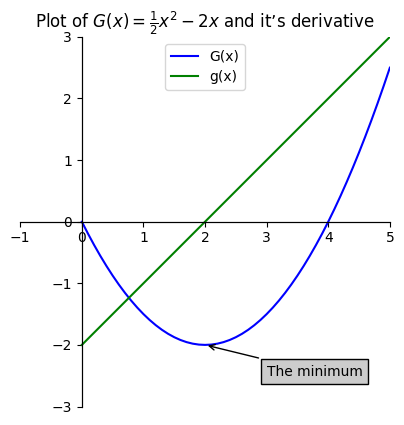

In [23]:
using PyPlot

xGrid = 0:0.1:5
G(x) = 1/2*x^2-2*x
g(x) = x - 2

ax = subplot()
ax[:spines]["left"][:set_position]("zero")
ax[:spines]["right"][:set_position]("zero")
ax[:spines]["bottom"][:set_position]("zero")
ax[:spines]["top"][:set_position]("zero")
ax[:set_xlim](-1, 5)
ax[:set_ylim](-3, 3)
ax[:set_aspect]("equal")

plot(xGrid, G.(xGrid), "b", label="G(x)", color="blue")
plot(xGrid, g.(xGrid), "b", label="g(x)", color="green")

legend(loc="upper center")
title(L"Plot of $G(x)= \frac{1}{2}x^2-2x$ and it’s derivative")

annotate("The minimum", xy=(2, -2), xytext=(3, -2.5), xycoords="data",
bbox=Dict("fc"=>"0.8"), arrowprops=Dict("facecolor"=>"black",
"arrowstyle"=>"->"));

## Histogram of Hailstone Sequence Lengths

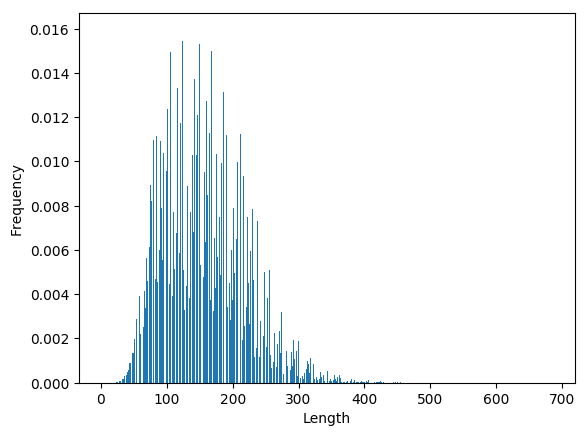

In [29]:
using PyPlot

function hail_length(x::Int)
    n = 0
    while x != 1
        if x % 2 == 0
            x = Int(x/2)
        else
            x = 3x +1
        end
        n += 1
    end
    return n
end

lengths = [hail_length(x0) for x0 in 2:10^7]

plt[:hist](lengths, 1000, normed="true")
xlabel("Length")
ylabel("Frequency");

## Graph

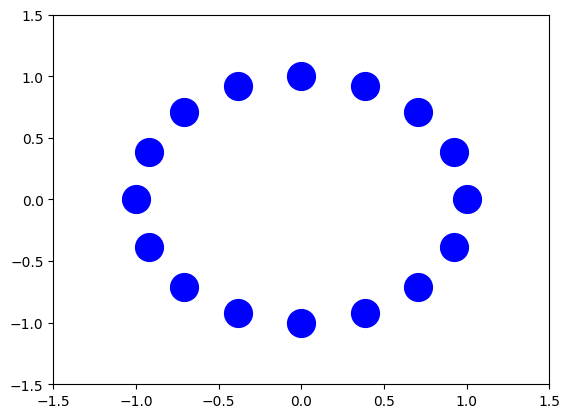

In [31]:
using PyPlot, PyCall
@pyimport matplotlib.animation as anim
@pyimport matplotlib.lines as line

function graphCreator(n::Int)
vertices = 1:n
complexPts = [exp(im*2*pi*k/n) for k in vertices]
coords = [(real(p),imag(p)) for p in complexPts]
xPts = first.(coords)
yPts = last.(coords)
edges = []
for v in vertices
[ push!(edges,(v,u)) for u in (v+1):n ]
end
    
fig, ax = subplots()
xlim(-1.5,1.5)
ylim(-1.5,1.5)
dots = line.Line2D(xPts, yPts, ls="None", marker="o",ms=20, mec="blue",
mfc="blue")
ax[:add_artist](dots)
    
function animate(i)
u, v = edges[i][1], edges[i][2]
xpoints = (xPts[u],xPts[v])
ypoints = (yPts[u],yPts[v])
ax[:plot](xpoints,ypoints,"r-")
end
ani = [animate(i) for i in 1:length(edges)]
anim.ArtistAnimation(fig, ani, interval=5, blit="False", repeat_delay=10)
end

graphCreator(16);

## Pseudo random number generation

In [34]:
using Random

Random.seed!(1974)
println("Seed 1974: ",rand(),"\t", rand(), "\t", rand())
Random.seed!(1975)
println("Seed 1975: ",rand(),"\t", rand(), "\t", rand())
Random.seed!(1974)
println("Seed 1974: ",rand(),"\t", rand(), "\t", rand())

Seed 1974: 0.21334106865797864	0.12757925830167505	0.5047074487066832
Seed 1975: 0.7672833719737708	0.8664265778687816	0.5807364110163316
Seed 1974: 0.21334106865797864	0.12757925830167505	0.5047074487066832


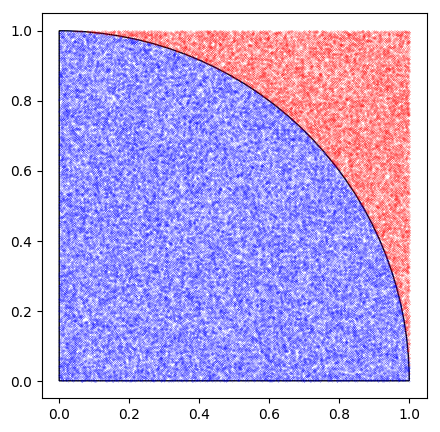

Pi Estimate: 3.14688


PyObject <matplotlib.patches.Wedge object at 0x7f10ac2fd350>

In [36]:
using Random, LinearAlgebra, PyPlot, PyCall
@pyimport matplotlib.patches as patch

Random.seed!()
N = 10^5
data = [[rand(),rand()] for _ in 1:N]
indata = filter((x)-> (norm(x) <= 1), data)
outdata = filter((x)-> (norm(x) > 1), data)
piApprox = 4*length(indata)/N

println("Pi Estimate: ", piApprox)
fig = figure("Primitives",figsize=(5,5))
plot(first.(indata),last.(indata),"b.",ms=0.2)
plot(first.(outdata),last.(outdata),"r.",ms=0.2)
ax = fig[:add_subplot](1,1,1)
ax[:set_aspect]("equal")
r1 = patch.Wedge([0,0],1,0, 90,fc="none",ec="black")
ax[:add_artist](r1)

# Random walks and seeds

In [7]:
using PyPlot, Random

N = 5000

function path(rng, alpha)
    x, y = 0., 0.
    xDat, yDat = [], []
    for _ in 1:N
        flip = rand(rng, 1:4)
        if flip == 1
            x += 1.
        elseif flip == 2
            y += 1.
        elseif flip == 3
            x -= (2*alpha) * rand(rng)
        else
            y += (2*alpha) * rand(rng)
        end
        
        push!(xDat, x)
        push!(yDat, y)
    end
    return xDat, yDat
end
        

path (generic function with 1 method)

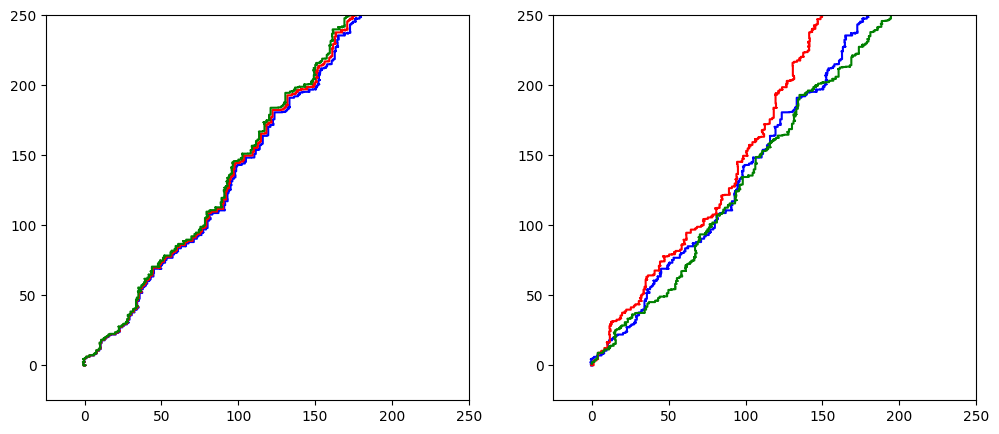

In [16]:
alphaRange = 0.2:0.01:0.22
figure(figsize=(12,5))
colors = ["b","r","g"]

subplot(121)
xlim(-25,250)
ylim(-25,250)
for i in 1:length(alphaRange)
    xDat,yDat = path(MersenneTwister(27),alphaRange[i])
    plot(xDat,yDat,color = colors[i])
end

subplot(122)
xlim(-25,250)
ylim(-25,250)

rng = MersenneTwister(27)
for i in 1:length(alphaRange)
    xDat,yDat = path(rng,alphaRange[i])
    plot(xDat,yDat,color = colors[i])
end